In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge
# evaluate knn on  with k-means ordinal discretization transform
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report,confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import KFold


from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import time

In [3]:
heart = pd.read_csv('dataset/cardiovascular.txt',delimiter=';')
#heart2 = pd.read_csv('dataset/heart_failure_clinical_records_dataset.csv')

In [4]:
dataset = heart

In [5]:
dataset.drop_duplicates(inplace=True)
dataset.reset_index(drop=True, inplace=True)

In [6]:
dataset = dataset.drop('ind', axis=1)
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
dataset['famhist']= label_encoder.fit_transform(dataset['famhist'])
dataset 

sbp  tobacco    ldl  adiposity  famhist  typea  obesity  alcohol  age  \
0    160    12.00   5.73      23.11        1     49    25.30    97.20   52   
1    144     0.01   4.41      28.61        0     55    28.87     2.06   63   
2    118     0.08   3.48      32.28        1     52    29.14     3.81   46   
3    170     7.50   6.41      38.03        1     51    31.99    24.26   58   
4    134    13.60   3.50      27.78        1     60    25.99    57.34   49   
..   ...      ...    ...        ...      ...    ...      ...      ...  ...   
457  214     0.40   5.98      31.72        0     64    28.45     0.00   58   
458  182     4.20   4.41      32.10        0     52    28.61    18.72   52   
459  108     3.00   1.59      15.23        0     40    20.09    26.64   55   
460  118     5.40  11.61      30.79        0     64    27.35    23.97   40   
461  132     0.00   4.82      33.41        1     62    14.70     0.00   46   

     chd  
0      1  
1      1  
2      0  
3      1  
4      1  
..   ...  
457    0  
458    1  
459    0  
460    0  
461    1  

[462 rows x 10 columns]

In [7]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

In [8]:
#Standerdize
def standardise(X):
    scaler = StandardScaler()
    scaler.fit(X)
    scaled_features = scaler.transform(X) # centering and scaling
    return(scaled_features)

In [9]:
## Train the Adaboost Classifier

## Train the Support Vector Classifier

In [10]:
def calculate_model(param,X,y):
    
    recall_list_10 = []
    precision_list_10 = []
    specificity_10 = []
    f1_list_10 = []
    accuracy_10 = []
    cpu_10 = []
    roc_10 = []
    

    kfold = KFold(n_splits=10, shuffle=True)
    for i in range(30):
        recall_list = []
        precision_list = []
        specificity = []
        f1_list = []
        accuracy = []
        cpu = []
        roc_list = []
        



        for train_ix, test_ix in kfold.split(X, y):




            X_train , X_test = X[train_ix],X[test_ix]
            y_train , y_test = y[train_ix] , y[test_ix]
            
            t0= time.time()
            if (param == 0):
                model = AdaBoostClassifier()
                
            else:
                model = AdaBoostClassifier(n_estimators=param['clf__n_estimators'], base_estimator=param['clf__base_estimator'],algorithm='SAMME.R',
                                           learning_rate=param['clf__learning_rate'])
                

          

            model.fit(X_train,y_train)
            predictions = model.predict(X_test)
            probs = model.predict_proba(X_test)
            probs = probs[:, 1]
            t1 = time.time() - t0
                        #print("Time elapsed: ", t1) # CPU seconds elapsed (floating point)
            cm = confusion_matrix(y_test,predictions)
            f1_list.append(f1_score(y_test, predictions, average="weighted")*100)

            recall_list.append(recall_score(y_test, predictions, average="weighted")*100)
            precision_list.append(precision_score(y_test, predictions, average="weighted")*100)
            specificity1 = cm[1,1]/(cm[0,1]+cm[1,1])
            if not np.isnan(specificity1):
                specificity.append( (cm[1,1]/(cm[0,1]+cm[1,1]))*100)
            accuracy.append(accuracy_score(y_test, predictions)*100)
            roc_list.append(roc_auc_score(y_test, probs)*100)
            cpu.append(t1)

        precision_list_10.append(sum(precision_list)/10)
        specificity_10.append(sum(specificity)/len(specificity))
        f1_list_10.append(sum(f1_list)/10)
        accuracy_10.append(sum(accuracy)/10)
        recall_list_10.append(sum(recall_list)/10)
        roc_10.append(sum(roc_list)/10)
        cpu_10.append(sum(cpu)/10)



   
    accu = sum(accuracy_10)/30
    pre = sum(precision_list_10)/30
    spec = sum(specificity_10)/30
    rec =  sum(recall_list_10)/30
    f1 =  sum(f1_list_10)/30
    roc = sum(roc_10)/30
    cpu = sum(cpu_10)/30
    return([accu,pre,spec,rec,f1,roc,cpu])



##  Grid serach 

In [11]:
from sklearn.pipeline import Pipeline

from sklearn.model_selection import GridSearchCV
def grid_search():
    clf = Pipeline([('clf', AdaBoostClassifier())])
    
    parameters = {
        'clf__base_estimator': [RandomForestClassifier(),DecisionTreeClassifier(),SVC(probability=True, kernel='linear')],
        'clf__n_estimators': [20, 50, 70, 100],
        'clf__learning_rate' : [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
        }

    
    gs_clf = GridSearchCV(clf, parameters, cv=10, n_jobs=-1)
    gs_clf = gs_clf.fit(X_train,y_train)
    print("Best score accurracy = %.3f%%" %((gs_clf.best_score_)*100.0))
    print("Best parameters are : ")
    print(gs_clf.best_params_)
    return(gs_clf.best_params_)



In [12]:
dict_Adaboost = {}

## First Model without preprocessing 

In [12]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

#from collections import defaultdict
scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

param = 0
X=scaled_features
result = calculate_model(param,X,y)
    
dict_Adaboost['Ada'] = result
dict_Adaboost


{'Ada': [67.45189639222941,
  67.62017455629346,
  53.720648994992786,
  67.45189639222941,
  66.87271925789156,
  70.30243720404168,
  0.07662921826044716]}

## Hypertune model using grid search

In [15]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)

param = grid_search()
#print(param)
X=scaled_features
result = calculate_model(param,X,y)
dict_Adaboost['Hypertuned'] = result
dict_Adaboost

Best score accurracy = 70.728%
Best parameters are : 
{'clf__base_estimator': SVC(kernel='linear', probability=True), 'clf__learning_rate': 0.01, 'clf__n_estimators': 100}


{'Ada': [66.94033302497688,
  67.17912155296274,
  52.812362580543585,
  66.94033302497688,
  66.3797296402377,
  69.77617766785323,
  0.08175030946731567],
 'Hypertuned': [72.66959605303732,
  72.97342493625062,
  67.98908776695154,
  72.66959605303732,
  70.64668706183424,
  77.42725867834044,
  1.5815662988026935]}

## PCA

In [22]:
from sklearn.decomposition import PCA
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values
pca = PCA(n_components= 5)
pca.fit(scaled_features)
x_pca = pca.transform(scaled_features)

In [23]:
pca.explained_variance_ratio_

array([0.32053161, 0.13301465, 0.11952794, 0.10496855, 0.09287428])

In [24]:
df_comp = pd.DataFrame(pca.components_,columns=dataset.iloc[:, 0:-1].columns)

<AxesSubplot:>

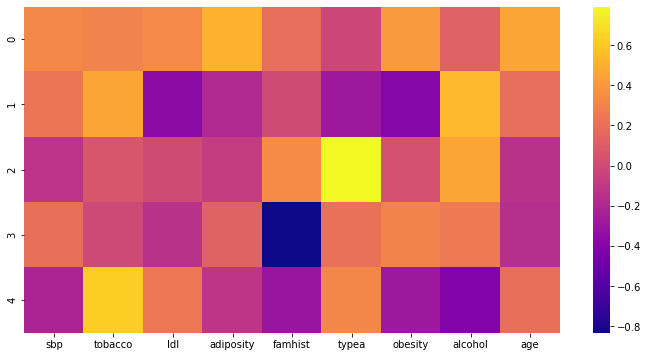

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [26]:
X = x_pca
y = dataset.iloc[:, -1].values
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=401)
param = grid_search()

result = calculate_model(param,X,y)
dict_Adaboost['Pca'] = result


Best score accurracy = 72.327%
Best parameters are : 
{'clf__base_estimator': RandomForestClassifier(), 'clf__learning_rate': 0.3, 'clf__n_estimators': 70}


In [27]:
result

[73.14862781375271,
 73.27722132375199,
 64.9376790279587,
 73.14862781375271,
 72.17100936325367,
 75.96127356441635,
 0.1570745309193929]

## Chi square 

In [28]:
from sklearn.feature_selection import chi2
X = dataset.iloc[:, 0:-1]
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=401
                                                   )


f_p_values=chi2(X_train,y_train)
f_p_values
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X_train.columns
p_values

p_values.sort_values(ascending=True)

age          8.486118e-49
tobacco      5.266493e-36
alcohol      1.857519e-21
adiposity    8.417227e-11
sbp          1.054212e-09
ldl          1.766591e-05
famhist      1.414204e-04
typea        2.945663e-02
obesity      2.623561e-01
dtype: float64

In [29]:
X = dataset[['age','adiposity','famhist','tobacco','sbp','ldl','alcohol']].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
X = scaled_features
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=401
                                                   )

param = grid_search()

result = calculate_model(param,X,y)
dict_Adaboost['Chi'] = result


Best score accurracy = 71.539%
Best parameters are : 
{'clf__base_estimator': SVC(kernel='linear', probability=True), 'clf__learning_rate': 0.01, 'clf__n_estimators': 100}


In [30]:
dict_Adaboost

{'Ada': [66.94033302497688,
  67.17912155296274,
  52.812362580543585,
  66.94033302497688,
  66.3797296402377,
  69.77617766785323,
  0.08175030946731567],
 'Hypertuned': [72.66959605303732,
  72.97342493625062,
  67.98908776695154,
  72.66959605303732,
  70.64668706183424,
  77.42725867834044,
  1.5815662988026935],
 'Pca': [73.14862781375271,
  73.27722132375199,
  64.9376790279587,
  73.14862781375271,
  72.17100936325367,
  75.96127356441635,
  0.1570745309193929],
 'Chi': [72.18038852913969,
  72.42240008600824,
  67.45825573778359,
  72.18038852913969,
  69.94360786507893,
  76.38494297545293,
  1.1996231182416282]}

## discritizer 

In [54]:
categorical_cols = ['famhist']

numerical_cols = ['age','adiposity','tobacco','sbp','ldl','alcohol','typea','obesity']
target_col = ["chd"]
from sklearn.preprocessing import KBinsDiscretizer
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
#trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
#trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data = trans.fit_transform(dataset[numerical_cols])
# convert the array back to a dataframe
num_cols = pd.DataFrame(data, dtype = 'int')
#num_cols = pd.DataFrame(data)
num_cols
num_cols.rename(columns = {0:'age', 1:'adiposity',2:'tobacco',3:'sbp',4:'ldl',5:'alcohol',6:'typea',7:'obesity'}, inplace = True)
df_add = dataset[categorical_cols].add(num_cols,fill_value=0)
df_add = pd.DataFrame(df_add, dtype = int)
df_add

adiposity  age  alcohol  famhist  ldl  obesity  sbp  tobacco  typea
0            4    7        6        1    3        3    5        3      5
1            6    9        0        0    2        4    3        0      6
2            7    6        0        1    1        4    1        0      6
3            8    8        1        1    3        5    5        2      5
4            5    6        3        1    1        3    2        4      7
..         ...  ...      ...      ...  ...      ...  ...      ...    ...
457          6    8        0        0    3        4    9        0      7
458          7    7        1        0    2        4    6        1      6
459          2    8        1        0    0        1    0        0      4
460          6    5        1        0    7        3    1        1      7
461          7    6        0        1    2        0    2        0      7

[462 rows x 9 columns]

In [32]:
X = df_add.iloc[::].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)
X = scaled_features
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=401
                                                   )

param = grid_search()

result = calculate_model(param,X,y)
dict_Adaboost['Discrete'] = result


Best score accurracy = 70.991%
Best parameters are : 
{'clf__base_estimator': SVC(kernel='linear', probability=True), 'clf__learning_rate': 0.001, 'clf__n_estimators': 20}


In [33]:
dict_Adaboost

{'Ada': [66.94033302497688,
  67.17912155296274,
  52.812362580543585,
  66.94033302497688,
  66.3797296402377,
  69.77617766785323,
  0.08175030946731567],
 'Hypertuned': [72.66959605303732,
  72.97342493625062,
  67.98908776695154,
  72.66959605303732,
  70.64668706183424,
  77.42725867834044,
  1.5815662988026935],
 'Pca': [73.14862781375271,
  73.27722132375199,
  64.9376790279587,
  73.14862781375271,
  72.17100936325367,
  75.96127356441635,
  0.1570745309193929],
 'Chi': [72.18038852913969,
  72.42240008600824,
  67.45825573778359,
  72.18038852913969,
  69.94360786507893,
  76.38494297545293,
  1.1996231182416282],
 'Discrete': [72.64646931853223,
  72.9769981884314,
  63.91407592378952,
  72.64646931853223,
  71.764330757118,
  76.59956314966755,
  0.2465160322189331]}

## Discritization(uniform) + Chi

In [55]:
X =  df_add
y = dataset.iloc[:, -1].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=401)

f_p_values=chi2(X_train,y_train)
f_p_values
import pandas as pd
p_values=pd.Series(f_p_values[1])
p_values.index=X.columns
p_values

p_values.sort_values(ascending=True)

age          6.998122e-17
tobacco      1.162708e-11
ldl          7.408570e-06
adiposity    1.697935e-05
famhist      1.414204e-04
sbp          2.342847e-04
alcohol      4.629642e-03
typea        2.881548e-01
obesity      3.534746e-01
dtype: float64

In [56]:
X = df_add[['age','adiposity','famhist','tobacco','ldl','sbp']].values
y = dataset.iloc[:, -1].values
scaled_features = standardise(X)

X=scaled_features
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=401
                                                   )

param = grid_search()

result = calculate_model(param,X,y)
dict_Adaboost['Discrete+Chi'] = result


Best score accurracy = 71.261%
Best parameters are : 
{'clf__base_estimator': SVC(kernel='linear', probability=True), 'clf__learning_rate': 0.01, 'clf__n_estimators': 50}


In [57]:
dict_Adaboost

{'Ada': [66.94033302497688,
  67.17912155296274,
  52.812362580543585,
  66.94033302497688,
  66.3797296402377,
  69.77617766785323,
  0.08175030946731567],
 'Hypertuned': [72.66959605303732,
  72.97342493625062,
  67.98908776695154,
  72.66959605303732,
  70.64668706183424,
  77.42725867834044,
  1.5815662988026935],
 'Pca': [73.14862781375271,
  73.27722132375199,
  64.9376790279587,
  73.14862781375271,
  72.17100936325367,
  75.96127356441635,
  0.1570745309193929],
 'Chi': [72.18038852913969,
  72.42240008600824,
  67.45825573778359,
  72.18038852913969,
  69.94360786507893,
  76.38494297545293,
  1.1996231182416282],
 'Discrete': [72.64646931853223,
  72.9769981884314,
  63.91407592378952,
  72.64646931853223,
  71.764330757118,
  76.59956314966755,
  0.2465160322189331],
 'Discrete+Chi': [71.94202898550725,
  72.1867880651776,
  65.22867521195694,
  71.94202898550725,
  70.30159847071812,
  76.10276750538362,
  0.7355040136973064],
 'MI': [71.19056429232192,
  71.27049834799423,

## Mutual Info 

In [44]:
from sklearn.feature_selection import mutual_info_classif
X = dataset.iloc[:, 0:-1]
#X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1]
scaled_features = standardise(X)
#Train-test split
X_train, X_test, y_train, y_test = train_test_split(scaled_features,y,
                                                    test_size=0.2, random_state=401
                                                   )
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.00965995, 0.06730304, 0.        , 0.        , 0.07678507,
       0.03062158, 0.00667202, 0.        , 0.08747908])

In [45]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

age          0.087479
famhist      0.076785
tobacco      0.067303
typea        0.030622
sbp          0.009660
obesity      0.006672
alcohol      0.000000
adiposity    0.000000
ldl          0.000000
dtype: float64

In [47]:
X = dataset[['age','famhist','tobacco','typea']].values
y = dataset.iloc[:, -1].values

X= standardise(X)   
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=401
                                                   )

param = grid_search()

result = calculate_model(param,X,y)
dict_Adaboost['MI'] = result


Best score accurracy = 69.369%
Best parameters are : 
{'clf__base_estimator': SVC(kernel='linear', probability=True), 'clf__learning_rate': 0.01, 'clf__n_estimators': 70}


In [48]:
dict_Adaboost

{'Ada': [66.94033302497688,
  67.17912155296274,
  52.812362580543585,
  66.94033302497688,
  66.3797296402377,
  69.77617766785323,
  0.08175030946731567],
 'Hypertuned': [72.66959605303732,
  72.97342493625062,
  67.98908776695154,
  72.66959605303732,
  70.64668706183424,
  77.42725867834044,
  1.5815662988026935],
 'Pca': [73.14862781375271,
  73.27722132375199,
  64.9376790279587,
  73.14862781375271,
  72.17100936325367,
  75.96127356441635,
  0.1570745309193929],
 'Chi': [72.18038852913969,
  72.42240008600824,
  67.45825573778359,
  72.18038852913969,
  69.94360786507893,
  76.38494297545293,
  1.1996231182416282],
 'Discrete': [72.64646931853223,
  72.9769981884314,
  63.91407592378952,
  72.64646931853223,
  71.764330757118,
  76.59956314966755,
  0.2465160322189331],
 'Discrete+Chi': [71.86540240518039,
  71.99138300723934,
  64.71713224139695,
  71.86540240518039,
  70.21386773816704,
  76.00426032007181,
  0.5976988919576008],
 'MI': [71.19056429232192,
  71.27049834799423

## Discrete kmeans

In [58]:
categorical_cols = ['famhist']

numerical_cols = ['age','adiposity','tobacco','sbp','ldl','alcohol','typea','obesity']
target_col = ["chd"]
from sklearn.preprocessing import KBinsDiscretizer
trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='kmeans')
#trans = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='kmeans')
#trans = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
data = trans.fit_transform(dataset[numerical_cols])
# convert the array back to a dataframe
num_cols = pd.DataFrame(data, dtype = 'int')
#num_cols = pd.DataFrame(data)
num_cols
num_cols.rename(columns = {0:'age', 1:'adiposity',2:'tobacco',3:'sbp',4:'ldl',5:'alcohol',6:'typea',7:'obesity'}, inplace = True)
df_add = dataset[categorical_cols].add(num_cols,fill_value=0)
df_add = pd.DataFrame(df_add, dtype = int)


X = df_add.iloc[::].values
y = dataset.iloc[:, -1].values



In [ ]:
scaled_features = standardise(X)
X = scaled_features
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=401
                                                   )

param = grid_search()

result = calculate_model(param,X,y)
dict_Adaboost['Discrete_kmeans'] = result


In [59]:
X = df_add[['age','adiposity','famhist','tobacco','ldl','sbp']].values
y = dataset.iloc[:, -1].values
scaled_features = standardise(X)

X=scaled_features
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.2, random_state=401
                                                   )

param = grid_search()

result = calculate_model(param,X,y)
dict_Adaboost['Discrete_kmeans_chi'] = result


Best score accurracy = 70.998%
Best parameters are : 
{'clf__base_estimator': SVC(kernel='linear', probability=True), 'clf__learning_rate': 0.001, 'clf__n_estimators': 100}


In [60]:
dict_Adaboost

{'Ada': [66.94033302497688,
  67.17912155296274,
  52.812362580543585,
  66.94033302497688,
  66.3797296402377,
  69.77617766785323,
  0.08175030946731567],
 'Hypertuned': [72.66959605303732,
  72.97342493625062,
  67.98908776695154,
  72.66959605303732,
  70.64668706183424,
  77.42725867834044,
  1.5815662988026935],
 'Pca': [73.14862781375271,
  73.27722132375199,
  64.9376790279587,
  73.14862781375271,
  72.17100936325367,
  75.96127356441635,
  0.1570745309193929],
 'Chi': [72.18038852913969,
  72.42240008600824,
  67.45825573778359,
  72.18038852913969,
  69.94360786507893,
  76.38494297545293,
  1.1996231182416282],
 'Discrete': [72.64646931853223,
  72.9769981884314,
  63.91407592378952,
  72.64646931853223,
  71.764330757118,
  76.59956314966755,
  0.2465160322189331],
 'Discrete+Chi': [71.94202898550725,
  72.1867880651776,
  65.22867521195694,
  71.94202898550725,
  70.30159847071812,
  76.10276750538362,
  0.7355040136973064],
 'MI': [71.19056429232192,
  71.27049834799423,

## Sequential Forward Selection

In [16]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)
svc =  LogisticRegression()
sfs = SFS(svc, 
          k_features=6, 
          forward=True, 
          floating=False, 
          scoring='accuracy',

          n_jobs=-1)
sfs = sfs.fit(X_train, y_train)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=3):
(0, 1, 2, 3, 6, 7)
('0', '1', '2', '3', '6', '7')
CV Score:
0.7074416882636061


In [17]:
feat_cols = list(sfs.k_feature_idx_)
feat_cols
X_train = X_train[:, feat_cols]
X_test = X_test[:, feat_cols]
X=scaled_features
X = X[:,feat_cols]
param =  grid_search()
result = calculate_model(param,X,y)
dict_Adaboost['SFS'] = result


Best score accurracy = 69.384%
Best parameters are : 
{'clf__base_estimator': RandomForestClassifier(), 'clf__learning_rate': 0.0001, 'clf__n_estimators': 70}


In [15]:
dict_Adaboost

{'Ada': [67.45189639222941,
  67.62017455629346,
  53.720648994992786,
  67.45189639222941,
  66.87271925789156,
  70.30243720404168,
  0.07662921826044716],
 'SFS': [68.38822078322542,
  67.87322629158429,
  56.04363359235651,
  68.38822078322542,
  67.00340611973819,
  68.88463576217887,
  0.16403962135314937]}

In [75]:
dict_Adaboost

{'Ada': [66.94033302497688,
  67.17912155296274,
  52.812362580543585,
  66.94033302497688,
  66.3797296402377,
  69.77617766785323,
  0.08175030946731567],
 'Hypertuned': [72.66959605303732,
  72.97342493625062,
  67.98908776695154,
  72.66959605303732,
  70.64668706183424,
  77.42725867834044,
  1.5815662988026935],
 'Pca': [73.14862781375271,
  73.27722132375199,
  64.9376790279587,
  73.14862781375271,
  72.17100936325367,
  75.96127356441635,
  0.1570745309193929],
 'Chi': [72.18038852913969,
  72.42240008600824,
  67.45825573778359,
  72.18038852913969,
  69.94360786507893,
  76.38494297545293,
  1.1996231182416282],
 'Discrete': [72.64646931853223,
  72.9769981884314,
  63.91407592378952,
  72.64646931853223,
  71.764330757118,
  76.59956314966755,
  0.2465160322189331],
 'Discrete+Chi': [71.94202898550725,
  72.1867880651776,
  65.22867521195694,
  71.94202898550725,
  70.30159847071812,
  76.10276750538362,
  0.7355040136973064],
 'MI': [71.19056429232192,
  71.27049834799423,

## Sequential  backward search 

In [25]:

from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

scaled_features = standardise(X)

X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, y, test_size=0.2, random_state=401)
svc =  LogisticRegression()
sfs = SFS(svc, 
          k_features=6, 
          forward=False, 
          floating=False, 
          scoring='accuracy',

          n_jobs=-1)
sfs = sfs.fit(X_train, y_train)

print('\nSequential Forward Selection (k=3):')
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print('CV Score:')
print(sfs.k_score_)


Sequential Forward Selection (k=3):
(2, 3, 4, 5, 6, 8)
('2', '3', '4', '5', '6', '8')
CV Score:
0.7234727878563495


In [26]:
feat_cols = list(sfs.k_feature_idx_)
feat_cols
X_train = X_train[:, feat_cols]
X_test = X_test[:, feat_cols]
X=scaled_features
X = X[:,feat_cols]
param =  grid_search()
result = calculate_model(param,X,y)
dict_Adaboost['SBS'] = result


Best score accurracy = 71.524%
Best parameters are : 
{'clf__base_estimator': SVC(kernel='linear', probability=True), 'clf__learning_rate': 0.0001, 'clf__n_estimators': 100}


In [78]:
df_dict = pd.DataFrame.from_dict(dict_Adaboost,orient='index', columns= ['Accuracy','Precision','Specificity','Recall','F1_score','Roc','CPU_time'])
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
Ada                  66.940333  67.179122    52.812363  66.940333  66.379730   
Hypertuned           72.669596  72.973425    67.989088  72.669596  70.646687   
Pca                  73.148628  73.277221    64.937679  73.148628  72.171009   
Chi                  72.180389  72.422400    67.458256  72.180389  69.943608   
Discrete             72.646469  72.976998    63.914076  72.646469  71.764331   
Discrete+Chi         71.942029  72.186788    65.228675  71.942029  70.301598   
MI                   71.190564  71.270498    64.432590  71.190564  69.198747   
Discrete_kmeans      72.618101  73.104895    62.869173  72.618101  72.006117   
Discrete_kmeans_chi  71.794326  72.263907    61.867803  71.794326  71.201421   
SFS                  69.281375  69.386696    61.966420  69.281375  66.644598   
SBS                  69.722017  69.692574    59.958864  69.722017  68.226816   

                           Roc  CPU_time  
Ada                  69.776178  0.081750  
Hypertuned           77.427259  1.581566  
Pca                  75.961274  0.157075  
Chi                  76.384943  1.199623  
Discrete             76.599563  0.246516  
Discrete+Chi         76.102768  0.735504  
MI                   76.987801  0.699145  
Discrete_kmeans      77.613451  0.249032  
Discrete_kmeans_chi  76.747643  1.232036  
SFS                  73.028942  0.606341  
SBS                  75.577889  1.123913

In [80]:
#df_dict.to_excel('xl_result\Adaboost_SA_30.xlsx')

In [28]:
#df_dict =  pd.read_excel('xl_result/Adaboost_SA_30.xlsx',index_col=0)

In [31]:
# Adding Number of features
df_dict['no_of_features'] = [9,9,'5 components',9,6,4,9,6,6,6]
df_dict

Accuracy  Precision  Specificity     Recall   F1_score  \
Ada                  66.940333  67.179122    52.812363  66.940333  66.379730   
Hypertuned           72.669596  72.973425    67.989088  72.669596  70.646687   
Pca                  73.148628  73.277221    64.937679  73.148628  72.171009   
Discrete             72.646469  72.976998    63.914076  72.646469  71.764331   
Discrete+Chi         71.942029  72.186788    65.228675  71.942029  70.301598   
MI                   71.190564  71.270498    64.432590  71.190564  69.198747   
Discrete_kmeans      72.618101  73.104895    62.869173  72.618101  72.006117   
Discrete_kmeans_chi  71.794326  72.263907    61.867803  71.794326  71.201421   
SFS                  69.281375  69.386696    61.966420  69.281375  66.644598   
SBS                  71.979957  72.506246    62.081029  71.979957  71.316642   

                           Roc  CPU_time no_of_features  
Ada                  69.776178  0.081750              9  
Hypertuned           77.427259  1.581566              9  
Pca                  75.961274  0.157075   5 components  
Discrete             76.599563  0.246516              9  
Discrete+Chi         76.102768  0.735504              6  
MI                   76.987801  0.699145              4  
Discrete_kmeans      77.613451  0.249032              9  
Discrete_kmeans_chi  76.747643  1.232036              6  
SFS                  73.028942  0.606341              6  
SBS                  76.288538  2.496749              6